In [25]:
import h5py
file_path = '/Volumes/T7/Freiburg/Pulseq_240710/meas_MID00020_FID20307_pulseq_fov220_nx146_sl40_mmt0_b1000_33dir.mat'
file_path = '/Volumes/T7 Shield/Freiburg/Pulseq_240710/meas_MID00033_FID20320_pulseq_fov220_nx146_sl40_mmt0_b1000_33dir.mat'

with h5py.File(file_path, 'r') as f:
    # List all the variables in the file
    print(list(f.keys()))

    # Access a specific variable (assuming variable name is 'data')
    data = f['I_short'][:]

    # If it's multidimensional and you need to work with it as a numpy array
    import numpy as np
    data = np.array(data)

['I_short']


In [26]:
data.shape

(32, 40, 146, 146)

In [27]:
import pandas as pd
excel_file = '/Users/ariel/Documents/GitHub/Pulseq-diffusion/demoSeq/diffusion_table/Book3_30B.xlsx'

df = pd.read_excel(excel_file, header = None)

In [28]:

import nrrd
from   dipy.io.image               import load_nifti
from   dipy.io.gradients           import read_bvals_bvecs
import matplotlib.pyplot           as     plt
from   cardpy.Data_Import          import *
from   cardpy.Data_Sorting         import *
from   cardpy.Data_Processing.DTI  import *
from   cardpy.Data_Processing.cDTI import * 
import numpy                       as     np
from   cardpy.Colormaps            import * 
from   cardpy.GUI_Tools.IntERCOMS  import * 

cDTI_cmaps     = cDTI_Colormaps_Generator()

In [29]:
bvals = [1000] * 30
bvals = np.concatenate((np.array([0]), np.array(bvals)))
bvecs = np.concatenate(([[0,0,0]],np.array(df)))
print(bvecs.shape)

(31, 3)


In [30]:

NifTi = np.concatenate((np.transpose(data, (2,3,1,0))[...,0:1], np.transpose(data, (2,3,1,0))[...,2:]), axis=-1)
bvals = [1000] * 33
bvals = np.concatenate((np.array([0]), np.array(bvals)))
[mat, _, _] = stacked2sorted(NifTi*1e8, bvals, bvecs)
[_, _, Eigenvectors, Standard_DTI_Metrics] = DTI_recon(mat, bvals, bvecs, tensor_fit = 'NLLS')

/opt/anaconda3/envs/CarDpy/lib/python3.8/site-packages/dipy/reconst/dti.py:498: RuntimeWarning: invalid value encountered in divide
  return 3 * np.sqrt(6) * determinant((A_squiggle / A_s_norm))


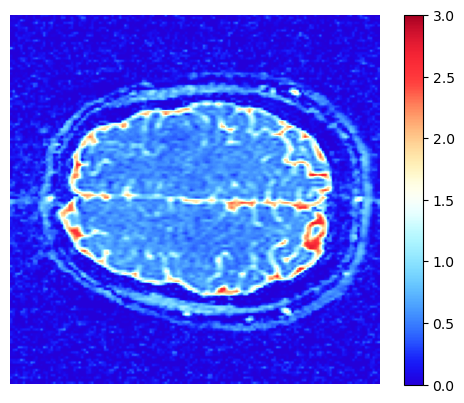

In [31]:
plt.imshow(Standard_DTI_Metrics['MD'][:,:,20], cmap = cDTI_cmaps['MD'],vmin = 0,vmax = 3)
plt.axis('off')
plt.colorbar()

In [32]:
Standard_DTI_Metrics['FA']

array([[[1.        , 0.5214421 , 0.76587001, ..., 1.        ,
         0.28367426, 0.49296965],
        [0.        , 1.        , 1.        , ..., 0.83750971,
         1.        , 0.84065677],
        [0.47439848, 1.        , 0.71795785, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.7581467 , 0.707409  , 1.        , ..., 1.        ,
         0.        , 0.71624141],
        [0.71864917, 0.74167213, 0.        , ..., 0.9899553 ,
         0.70792178, 1.        ],
        [0.36417215, 1.        , 0.        , ..., 0.65461147,
         0.22249203, 0.        ]],

       [[0.3582939 , 0.        , 0.34976121, ..., 1.        ,
         0.79336873, 1.        ],
        [0.91079244, 1.        , 1.        , ..., 1.        ,
         1.        , 0.83928103],
        [1.        , 0.41445355, 0.39534585, ..., 0.        ,
         1.        , 0.83437164],
        ...,
        [0.73374292, 0.77390085, 1.        , ..., 0.        ,
         1.        , 1.        ],
        [1. 